In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# 逻辑回归

逻辑回归模型的概率估计：$\hat{p}=h_{\theta}(\mathbf{x})=\sigma\left(\theta^{T} \cdot \mathbf{x}\right)$  
sigmoid函数： $\sigma(t)=\frac{1}{1+\exp (-t)}$

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

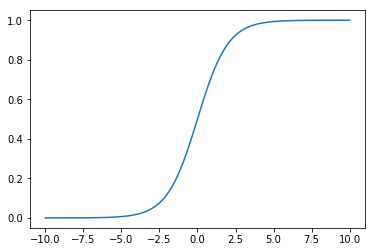

In [5]:
x = np.linspace(-10,10,100)
y = sigmoid(x)
fig, ax = plt.subplots()
ax.plot(x,y,'-')

逻辑回归的损失函数（对数损失）:$J(\theta)=-\frac{1}{m} \sum_{i=1}^{m}\left[y^{(i)} \log \left(\hat{p}^{(i)}\right)+\left(1-y^{(i)}\right) \log \left(1-\hat{p}^{(i)}\right)\right]$

这个损失函数是凸的，所以梯度下降（或任何其他优化算法） 一定能够找到全局最小值

逻辑回归损失函数的偏导数：$\frac{\partial}{\partial \theta_{j}} J\left(\theta_{j}\right)=\frac{1}{m} \sum_{i=1}^{m}\left(\sigma\left(\theta^{T} \cdot \mathbf{x}^{(i)}\right)-y^{(i)}\right) x_{j}^{(i)}$

In [7]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [12]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
# X花瓣的宽度
X = iris['data'][:,3:]
y = (iris["target"] == 2).astype(np.int)

In [11]:
X.shape,y.shape

((150, 1), (150,))

In [14]:
#使用花瓣的宽度特征来识别 Virginica
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

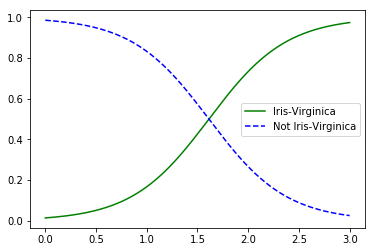

In [19]:
#看看模型估计的花瓣宽度从 0 到 3 厘米的概率估计
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new,y_proba[:,1],'g-',label='Iris-Virginica')
plt.plot(X_new,y_proba[:,0],'b--',label='Not Iris-Virginica')
plt.legend()

Virginica 花的花瓣宽度（用三角形表示） 在 1.4 厘米到 2.5 厘米之间，而其他种类的花（由正方形表示） 通常具有较小的花瓣宽度，范围从 0.1 厘米到 1.8 厘米。注意，它们之间会有一些重叠。

在 1.6 厘米左右存在一个决策边界，这时两类情况出现的概率都等于 50%：如果花瓣宽度大于 1.6 厘米，则分类器将预测该花是 Virginica，否则预测它不是

In [20]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

# Softmax 回归

Logistic 回归模型可以直接推广到支持多类别分类，不必组合和训练多个二分类器，其称为 Softmax 回归或多类别 Logistic 回归

Softmax 函数：$\hat{p}_{k}=\sigma(\mathbf{s}(\mathbf{x})) k=\frac{\exp \left(s_{k}(\mathbf{x})\right)}{\sum_{j=1}^{K} \exp \left(s_{j}(\mathbf{x})\right)}$  
- ${k}$表示有多少类
- ${s}(\mathbf{x})$表示包含样本 x 每一类得分的向量
- $\sigma(\mathbf{s}(\mathbf{x}))$表示给定每一类分数之后，实例 x 属于第 k 类的概率

交叉熵：$J(\Theta)=-\frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y_{k}^{(i)} \log \left(\hat{p}_{k}^{(i)}\right)$  

可以看出，当只有两个类时，此损失函数等同于 Logistic 回归的损失函数（对数损失）

交叉熵通常用于衡量待测类别与目标类别的匹配程度

In [21]:
#使用 Softmax 回归对三种鸢尾花进行分类
X = iris['data'][:,(2,3)] # petal length, petal width
y = iris['target']

In [22]:
softmax_reg = LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
softmax_reg.predict([[5,2]])

array([2])

In [24]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

Softmax 回归分类器一次只能预测一个类（即它是多类的，但不是多输出的）